<a href="https://colab.research.google.com/github/AustinReed-1/Display-Projects/blob/master/CUAI-intro-Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


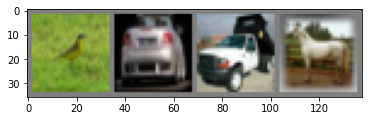

 bird   car truck horse
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 12, 12]          32,832
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Linear-5                  [-1, 120]         276,600
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 321,342
Trainable params: 321,342
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.36
Params size (MB): 1.23
Estimated Total Size (MB): 1.60
----------------------------------------------------------------
Training...
[1,  2000] loss: 2.071
[1,  4000] loss: 1.685
[1,  6000] loss: 1.521
[

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Initialising the CPU/GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device: %s' % device)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
epochs = 10
bs = 4

%matplotlib inline

#Data loading and pre-processing

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Preparing the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True, num_workers=2)

# Preparing the testing set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=False, num_workers=2)

"""
The following code is to display the CIFAR10 images post-transformation. It is not necessary, but allows you to visualise the data
"""

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images with labels
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #convoluational layers
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 4)
        #pooling layers
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(6*6*64, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        """
        Input Layer -> Convolutional Layer -> Maxpooling -> Convolutional Layer -> Maxpooling -> FC1 -> FC2 -> FC3 -> Output
        """
        # 32*32*3 into 30*30*32
        # then pool to 15*15*32
        x = self.pool(F.relu(self.conv1(x)))
        # 15*15*32 into 12*12*64
        # then pool to 6*6*64
        x = self.pool(F.relu(self.conv2(x)))
        # flatten
        x = x.view(-1, 6*6*64)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#Metting 2
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

print('Training...')

for epoch in range(epochs): #Looping over the dataset multiple times, based on the pre-defined number of epochs

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0): #if you don't know what enumerate does, please give us a shout!
        #get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        #zero the parameter gradients. We are using SGD (in case you forgot)
        optimizer.zero_grad()

        #forward + backward + optimise
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        ########

        #print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: #print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished.')



In [ ]:
#Evaluate model
class_correct = list(0. for i in range(10))
class_total =list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
      images, labels = data[0].to(device), data[1].to(device)
      outputs = net(images)
      _, predicted  = torch.max(outputs,1)
      c = (predicted == labels).squeeze()
      for i in range(bs):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

print(np.array(class_correct)/np.array(class_total))
for i in range(10):
  print('Accuracy of %5s: %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i]
  ))

[0.974  0.956  0.9056 0.8918 0.9378 0.867  0.903  0.9694 0.92   0.9672]
Accuracy of plane: 97 %
Accuracy of   car: 95 %
Accuracy of  bird: 90 %
Accuracy of   cat: 89 %
Accuracy of  deer: 93 %
Accuracy of   dog: 86 %
Accuracy of  frog: 90 %
Accuracy of horse: 96 %
Accuracy of  ship: 92 %
Accuracy of truck: 96 %
